# Master Docs

Confluence Link: https://tinyurl.com/3c3dzz9v 

# Initial Data Preprocessing

In [7]:
import re
import pandas as pd
import nltk
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer

# Dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

# Dictionary containing common abbreviations and their meanings.
abbreviations = {
    "$": " dollar ", "€": " euro ", "4ao": "for adults only", "a.m": "before midday", 
    "a3": "anytime anywhere anyplace", "afaik": "as far as I know", "app": "application", 
    "asap": "as soon as possible", "atm": "at the moment", "brb": "be right back", "btw": "by the way",
    "cu": "see you", "faq": "frequently asked questions", "fyi": "for your information", "g9": "genius", 
    "idk": "I do not know", "imho": "in my humble opinion", "imo": "in my opinion", "irl": "in real life",
    "jk": "just kidding", "lol": "laughing out loud", "omg": "oh my god", "omw": "on my way", 
    "ppl": "people", "rofl": "rolling on the floor laughing", "smh": "shake my head", 
    "tbh": "to be honest", "thx": "thank you", "ttyl": "talk to you later", "u": "you", 
    "w/": "with", "w/o": "without", "wtf": "what the fuck", "wtg": "way to go", "wyd": "what you doing"
}

# Downloading required NLTK resources
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

class data_cleaning:
    def __init__(self, file_path):
        # Initialize with the path to the CSV file
        self.file_path = file_path
        self.df_data = None
        self.stop_word = set(stopwords.words('english'))
        self.stemmer = PorterStemmer()  # For stemming (optional)
        self.lemmatizer = WordNetLemmatizer()  # For lemmatization
        self.tokenizer = WordPunctTokenizer()  # For tokenizing
    
    def load_data(self):
        # Loading data from CSV file
        self.df_data = pd.read_csv(self.file_path, encoding='latin-1', 
                                   names=['target', 'id', 'date', 'flag', 'user', 'text'])
        print("Data loaded successfully.")
        
    def expand_contractions(self, text):
        # Expand contractions in the text using the 'contractions' library
        return contractions.fix(text)
    
    def replace_emojis(self, text):
        # Replace emojis with their meanings
        for emoji, meaning in emojis.items():
            text = text.replace(emoji, meaning)
        return text
    
    def replace_abbreviations(self, text):
        # Replace abbreviations with their meanings
        for abbr, full_form in abbreviations.items():
            text = re.sub(r'\b' + re.escape(abbr) + r'\b', full_form, text)
        return text
    
    def clean_text(self, text):
        # Step 1: Normalize text (convert to lowercase)
        text = text.lower()
        
        # Step 2: Expand contractions (e.g., "don't" -> "do not")
        text = self.expand_contractions(text)
        
        # Step 3: Replace emojis with meanings
        text = self.replace_emojis(text)
        
        # Step 4: Replace abbreviations with full forms
        text = self.replace_abbreviations(text)
        
        # Step 5: Remove URLs
        text = re.sub(r'http\S+', '', text)
        
        # Step 6: Remove mentions (e.g., @username)
        text = re.sub(r'@\w+', '', text)
        
        # Step 7: Remove special characters and punctuation
        text = re.sub(r'[^a-z\s]', '', text)
        
        # Step 8: Tokenization (split text into words)
        tokens = word_tokenize(text)
        
        # Step 9: Remove stopwords (commonly used words that don't carry much meaning)
        tokens = [word for word in tokens if word not in self.stop_word]
        
        # Step 10: Lemmatization (convert words to base form)
        tokens = [self.lemmatizer.lemmatize(word) for word in tokens]
        
        # Optional Step 11: Stemming (reducing words to their root form)
        tokens = [self.stemmer.stem(word) for word in tokens]  
        
        # Step 12: Join the tokens back into a single string
        cleaned_text = ' '.join(tokens)
        
        return cleaned_text
    
    def clean_data(self):
        # Applying text cleaning to the dataset
        if self.df_data is not None:
            self.df_data['cleaned_text'] = self.df_data['text'].apply(self.clean_text)
            print("Text data cleaned.")
        else:
            print("Data not loaded yet. Please load the data first.")
    
    def replace_target_values(self):
        # Replacing target values: 4 -> 1 for positive sentiment
        if self.df_data is not None:
            self.df_data['target'] = self.df_data['target'].replace(4, 1)
            print("Target values replaced: 4 -> 1 for positive sentiment.")
        else:
            print("Data not loaded yet. Please load the data first.")
    
    def save_cleaned_data(self, output_file):
        # Saving the cleaned data to a new CSV file
        if self.df_data is not None:
            self.df_data.to_csv(output_file, index=False)
            print(f"Cleaned data saved to {output_file}.")
        else:
            print("No data to save. Please clean the data first.")
    
    def sentiment_distribution(self):
        # Checking sentiment distribution
        if self.df_data is not None:
            print(f"Total Tweets: {len(self.df_data)}")
            print(self.df_data['target'].value_counts())
        else:
            print("Data not loaded yet. Please load the data first.")

# Main execution block
if __name__ == "__main__":
    file_path = "training_datasets.csv"
    output_file = "cleaned_data.csv"
    
    # Calling data_cleaning class
    data = data_cleaning(file_path)
    
    # Loading the dataset
    data.load_data()
    
    # Cleaning the text data
    data.clean_data()
    
    # Replacing target values (4 -> 1)
    data.replace_target_values()
    
    # Checking sentiment distribution
    data.sentiment_distribution()
    
    # Saving the cleaned data to a new file
    data.save_cleaned_data(output_file)

Data loaded successfully.
Text data cleaned.
Target values replaced: 4 -> 1 for positive sentiment.
Total Tweets: 1600000
target
0    800000
1    800000
Name: count, dtype: int64
Cleaned data saved to C:\Users\Acer\Labs\DSMM_Term_02\BhavikG_App1034\Project\dev-br\dev\New\cleaned_data.csv.


### Training Datasets

In [6]:
file_path_datasets = "training_datasets.csv"
df_data = pd.read_csv(file_path_datasets, encoding='ISO-8859-1')
df_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


### Cleaned Data

In [4]:
file_path = "cleaned_data.csv"
df_data = pd.read_csv(file_path)
df_data.head()

,target,id,date,flag,user,text,cleaned_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda got david carr third day wink
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save rest go bound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behav mad see


#  Logistic Regression Model 

Cleaned data loaded successfully.
Accuracy Score: 0.770284375

Precision Score: 0.7591556596185812

Recall Score: 0.7938768644162835

F1 Score: 0.7761281303962504

Confusion Matrix:
 [[119069  40425]
 [ 33084 127422]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76    159494
           1       0.76      0.79      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000


AUC Score: 0.8502624052650467


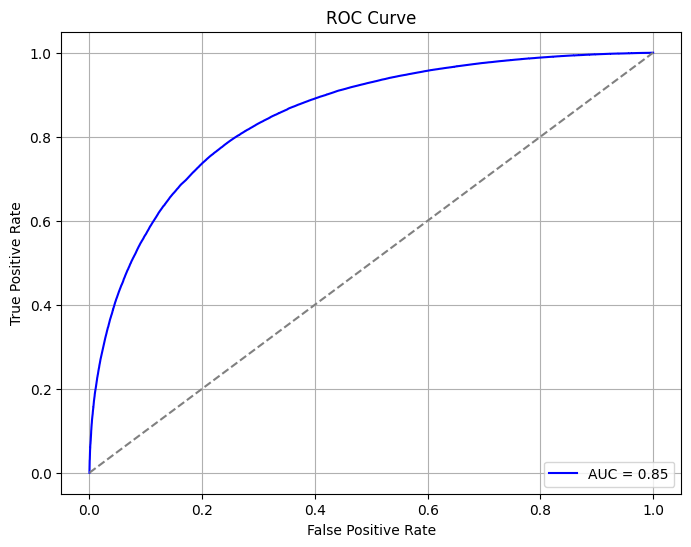

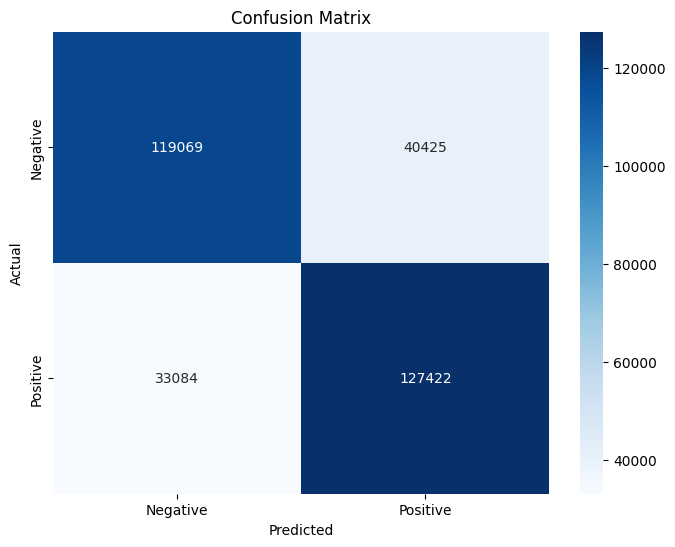

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

class SentimentModel:
    def __init__(self, cleaned_file_path):
        self.cleaned_file_path = cleaned_file_path
        self.df_data = None
        
    def load_cleaned_data(self):
        # Load the cleaned data
        self.df_data = pd.read_csv(self.cleaned_file_path)
        print("Cleaned data loaded successfully.")
    
    def train_sentiment_model(self):
        # Replace NaN values in 'cleaned_text' with an empty string
        self.df_data['cleaned_text'] = self.df_data['cleaned_text'].fillna('')
        if self.df_data is not None:
            # Vectorization of the text data using TfidfVectorizer
            vectorizer = TfidfVectorizer()  # max_features=10000)  # Limiting to 5000 features
            X = vectorizer.fit_transform(self.df_data['cleaned_text'])
            y = self.df_data['target']
            
            # Splitting data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Creating and training the Logistic Regression model
            model = LogisticRegression(max_iter=1000)
            model.fit(X_train, y_train)
            
            # Predicting on test set
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
            
            # Model performance evaluation
            print('Accuracy Score:', accuracy_score(y_test, y_pred))
            print('\nPrecision Score:', precision_score(y_test, y_pred))
            print('\nRecall Score:', recall_score(y_test, y_pred))
            print('\nF1 Score:', f1_score(y_test, y_pred))
            print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            
            # Adding AUC score
            auc_score = roc_auc_score(y_test, y_pred_proba)
            print('\nAUC Score:', auc_score)
            
            # Plotting the ROC curve
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
            
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='b', label=f'AUC = {auc_score:.2f}')
            plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
            plt.title('ROC Curve')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend(loc='lower right')
            plt.grid(True)
            plt.show()
            
            # Plotting Confusion Matrix
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
            plt.title('Confusion Matrix')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()
        else:
            print("Cleaned data not loaded yet. Please load the data first.")
            
# Main execution block
if __name__ == "__main__":
    cleaned_file_path = "cleaned_data.csv"
    
    # Calling SentimentModel class
    sentiment_model = SentimentModel(cleaned_file_path)
    
    # Loading cleaned data
    sentiment_model.load_cleaned_data()
    
    # Training the sentiment analysis model
    sentiment_model.train_sentiment_model()

# Model Tuning with Hyperparameters

Cleaned data loaded successfully.
Accuracy Score: 0.78035
Precision Score: 0.7701202424010156
Recall Score: 0.8012597659900564
F1 Score: 0.785381463319308

Confusion Matrix:
 [[121105  38389]
 [ 31899 128607]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78    159494
           1       0.77      0.80      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

AUC Score: 0.862187831528267


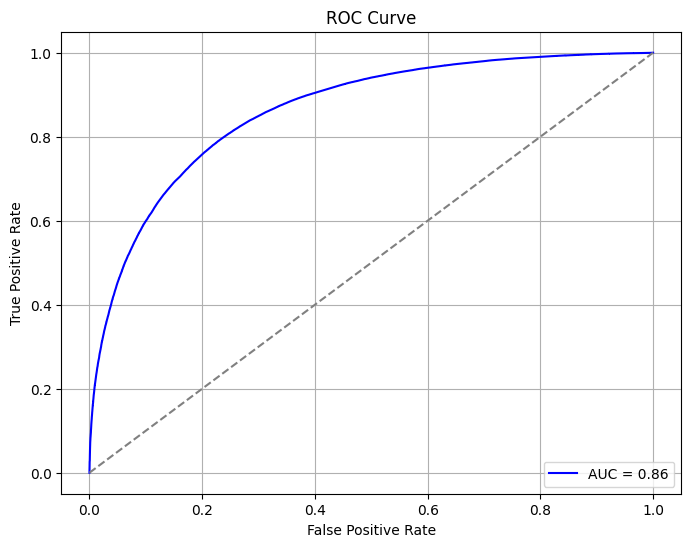

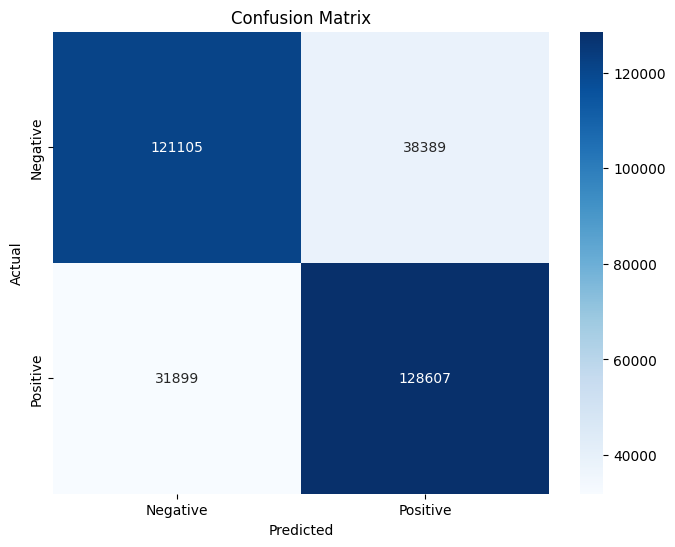

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

class SentimentModel:
    def __init__(self, cleaned_file_path):
        self.cleaned_file_path = cleaned_file_path
        self.df_data = None
        
    def load_cleaned_data(self):
        # Load the cleaned data
        self.df_data = pd.read_csv(self.cleaned_file_path)
        print("Cleaned data loaded successfully.")
    
    def train_sentiment_model(self):
        # Replace NaN values in 'cleaned_text' with an empty string
        self.df_data['cleaned_text'] = self.df_data['cleaned_text'].fillna('')
        
        if self.df_data is not None:
            # Vectorization of the text data using TfidfVectorizer
            vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=50000)  # 1 to 3-grams
            X = vectorizer.fit_transform(self.df_data['cleaned_text'])
            y = self.df_data['target']
            
            # Splitting data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Setting up Logistic Regression model with GridSearchCV
            model = LogisticRegression(C=2, max_iter=1000, n_jobs=-1)
    
            
            # Fitting the grid search on the training data
            model.fit(X_train, y_train)
            
            
            # Predicting on the test set using the best model
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
            
            # Model performance evaluation
            print('Accuracy Score:', accuracy_score(y_test, y_pred))
            print('Precision Score:', precision_score(y_test, y_pred))
            print('Recall Score:', recall_score(y_test, y_pred))
            print('F1 Score:', f1_score(y_test, y_pred))
            print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            
            # Adding AUC score
            auc_score = roc_auc_score(y_test, y_pred_proba)
            print('AUC Score:', auc_score)
            
            # Plotting the ROC curve
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='b', label=f'AUC = {auc_score:.2f}')
            plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
            plt.title('ROC Curve')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend(loc='lower right')
            plt.grid(True)
            plt.show()
            
            # Plotting Confusion Matrix
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
            plt.title('Confusion Matrix')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()
            
        else:
            print("Cleaned data not loaded yet. Please load the data first.")
            
# Main execution block
if __name__ == "__main__":
    cleaned_file_path = "cleaned_data.csv"
    
    # Calling SentimentModel class
    sentiment_model = SentimentModel(cleaned_file_path)
    
    # Loading cleaned data
    sentiment_model.load_cleaned_data()
    
    # Training the sentiment analysis model with GridSearchCV
    sentiment_model.train_sentiment_model()

# Advanced Model Combination with Random Forest

In [14]:
class SentimentAnalysisPipeline:
    def __init__(self, data_path, sample_size=500000):
        self.data_path = data_path
        self.sample_size = sample_size
        self.tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
        self.scaler = StandardScaler()
        self.model = None
        self.best_model_random = None
        self.best_model_grid = None

    def load_and_prepare_data(self):
        data = pd.read_csv(self.data_path)
        data = data.sample(n=self.sample_size, random_state=42)
        data['cleaned_text'] = data['cleaned_text'].fillna('').astype(str)

        # Feature engineering
        stop_words = set(nltk.corpus.stopwords.words('english'))
        data['text_length'] = data['cleaned_text'].apply(len)
        data['word_count'] = data['cleaned_text'].apply(lambda x: len(x.split()))
        data['stopword_count'] = data['cleaned_text'].apply(
            lambda x: sum(1 for word in x.split() if word in stop_words)
        )
        data['avg_word_length'] = data['cleaned_text'].apply(
            lambda x: np.mean([len(word) for word in x.split()]) if len(x.split()) > 0 else 0
        )

        self.X_text = data['cleaned_text']
        self.X_features = data[['text_length', 'word_count', 'stopword_count', 'avg_word_length']]
        self.y = data['target']

    def preprocess_and_split(self):
        X_features_scaled = self.scaler.fit_transform(self.X_features)

        X_text_train, X_text_test, X_features_train, X_features_test, y_train, y_test = train_test_split(
            self.X_text, X_features_scaled, self.y, test_size=0.2, random_state=42, stratify=self.y
        )

        X_text_train_tfidf = self.tfidf.fit_transform(X_text_train)
        X_text_test_tfidf = self.tfidf.transform(X_text_test)

        self.X_train_combined = hstack([X_text_train_tfidf, X_features_train])
        self.X_test_combined = hstack([X_text_test_tfidf, X_features_test])
        self.y_train = y_train
        self.y_test = y_test

    def train_model(self):
        random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, n_jobs=-1, random_state=42)
        logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

        self.model = StackingClassifier(
            estimators=[('rf', random_forest), ('lr', logistic_regression)],
            final_estimator=LogisticRegression(max_iter=1000),
            cv=5
        )
        self.model.fit(self.X_train_combined, self.y_train)

    def evaluate_model(self, model=None, label="Model"):
        if model is None:
            model = self.model

        y_pred = model.predict(self.X_test_combined)
        y_prob = model.predict_proba(self.X_test_combined)[:, 1]

        print(f"{label} Accuracy:", accuracy_score(self.y_test, y_pred))
        print(f"{label} Confusion Matrix:\n", confusion_matrix(self.y_test, y_pred))
        print(f"{label} Classification Report:\n", classification_report(self.y_test, y_pred))
        print(f"{label} AUC Score:", roc_auc_score(self.y_test, y_prob))

        fpr, tpr, thresholds = roc_curve(self.y_test, y_prob)
        plt.figure()
        plt.plot(fpr, tpr, label=f'{label} ROC curve (AUC = {roc_auc_score(self.y_test, y_prob):.2f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{label} Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

    def hyperparameter_tuning(self, method="random", param_grid=None, n_iter=10):
        if method == "random":
            search = RandomizedSearchCV(self.model, param_grid, n_iter=n_iter, cv=3, n_jobs=-1, scoring='accuracy')
        elif method == "grid":
            search = GridSearchCV(self.model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
        else:
            raise ValueError("Invalid method. Choose 'random' or 'grid'.")

        search.fit(self.X_train_combined, self.y_train)
        if method == "random":
            self.best_model_random = search.best_estimator_
        elif method == "grid":
            self.best_model_grid = search.best_estimator_

        return search.best_estimator_

    def save_pipeline(self):
        self.save_model('tfidf_vectorizer.pkl', self.tfidf)
        self.save_model('scaler.pkl', self.scaler)
        self.save_model('stacking_clf.pkl', self.model)
        if self.best_model_random:
            self.save_model('best_model_random.pkl', self.best_model_random)
        if self.best_model_grid:
            self.save_model('best_model_grid.pkl', self.best_model_grid)

    def save_model(self, filename, model):
        with open(filename, 'wb') as file:
            pickle.dump(model, file)

    def load_pipeline(self):
        self.tfidf = self.load_model('tfidf_vectorizer.pkl')
        self.scaler = self.load_model('scaler.pkl')
        self.model = self.load_model('stacking_clf.pkl')
        try:
            self.best_model_random = self.load_model('best_model_random.pkl')
            self.best_model_grid = self.load_model('best_model_grid.pkl')
        except FileNotFoundError:
            self.best_model_random = None
            self.best_model_grid = None

    def load_model(self, filename):
        with open(filename, 'rb') as file:
            return pickle.load(file)


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Search Tuned Model Accuracy: 0.76433
Random Search Tuned Model Confusion Matrix:
 [[36963 12912]
 [10655 39470]]
Random Search Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76     49875
           1       0.75      0.79      0.77     50125

    accuracy                           0.76    100000
   macro avg       0.76      0.76      0.76    100000
weighted avg       0.76      0.76      0.76    100000

Random Search Tuned Model AUC Score: 0.8445024027400171


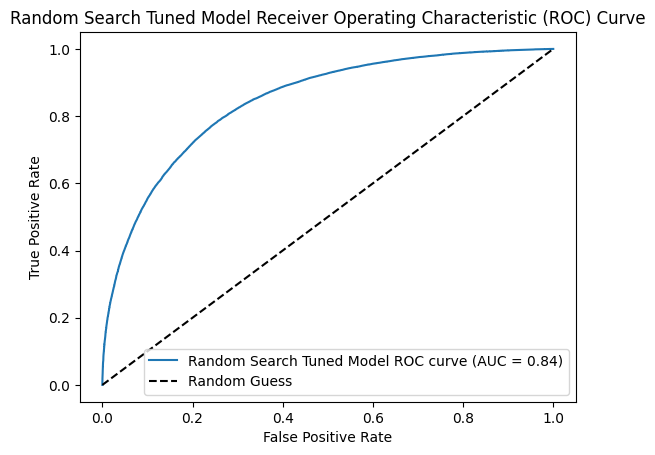

In [ ]:
pipeline = SentimentAnalysisPipeline(data_path="cleaned_data.csv")
pipeline.load_and_prepare_data()
pipeline.preprocess_and_split()
pipeline.train_model()

# Hyperparameter tuning with RandomizedSearchCV
random_param_grid = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [5, 10],
    'lr__C': [0.1, 1]
}
best_model_random = pipeline.hyperparameter_tuning(method="random", param_grid=random_param_grid)
pipeline.evaluate_model(best_model_random, label="Random Search Tuned Model")

# # Hyperparameter tuning with GridSearchCV
# grid_param_grid = {
#     'rf__n_estimators': [100, 200],
#     'rf__max_depth': [None, 10, 20],
#     'lr__C': [0.1, 1, 10]
# }
# best_model_grid = pipeline.hyperparameter_tuning(method="grid", param_grid=grid_param_grid)
# pipeline.evaluate_model(best_model_grid, label="Grid Search Tuned Model")

# Save pipeline
pipeline.save_pipeline()


### Insights from Tuning

### Precision vs Recall Trade-off: 
    By adjusting hyperparameters, the model achieves a balanced precision and recall. Higher recall ensures that the model correctly identifies more positive instances (important for sentiment classification), but precision ensures that the positive predictions are accurate.

### AUC Score: 
    The AUC score helps measure the model's ability to distinguish between the two classes. The improvements in the AUC score after tuning suggest that the model is better at classifying positive and negative sentiment.

### Combining Models: 
    Stacking models (Logistic Regression with Random Forest) improves model performance, leveraging the strengths of both models.